<a href="https://colab.research.google.com/github/gizattos/cost_of_living_clustering/blob/master/cost_of_living_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

## importando bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn import preprocessing


<h1>Lendo CSV</h1>

In [96]:
## realizando transposição de colunas
df = pd.read_csv('/content/cost-of-living.csv',index_col=[0]).T.reset_index()
df = df.rename(columns={'index':'local'})
df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,7.60,0.63,5.87,0.88,1.89,2.20,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.70,645.94,10.29,1.47,0.26,4.40,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.50,31.32,1.05,24443.15,291.55,177.72,545.50,314.98,59.33,0.11,14.20,25.10,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.00,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.20,22.48,52.74,42.20,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.00,2.23,2.95,7.70,2.80,9.42,59.70,1.54,22000.00,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.00,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.00,1.00,47.04,2.10,1.75,0.91,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.10,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.10,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.30,0.18,3.11,0.70,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


In [97]:
df.shape

(160, 56)

In [98]:
## dados faltantes
df.isna().sum()

local                                                                         0
Meal, Inexpensive Restaurant                                                  0
Meal for 2 People, Mid-range Restaurant, Three-course                         0
McMeal at McDonalds (or Equivalent Combo Meal)                                0
Domestic Beer (0.5 liter draught)                                             0
Imported Beer (0.33 liter bottle)                                             0
Coke/Pepsi (0.33 liter bottle)                                                0
Water (0.33 liter bottle)                                                     0
Milk (regular), (1 liter)                                                     0
Loaf of Fresh White Bread (500g)                                              0
Eggs (regular) (12)                                                           0
Local Cheese (1kg)                                                            0
Water (1.5 liter bottle)                

In [0]:
## criano nova columa média
df['media'] = df.sum(axis=1)/55

In [0]:
local = df.local

In [0]:
## codificando valores
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [102]:
df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",media
0,119,68,58,36,50,25,33,30,43,34,19,84,32,31,27,53,19,26,39,89,14,63,80,76,81,74,79,2,6,49,117,36,124,123,93,120,80,76,62,115,50,11,36,35,41,25,44,50,24,70,16,12,47,87,105,64,74
1,63,31,12,22,66,47,25,8,17,7,46,27,4,50,75,88,32,16,25,74,43,110,30,27,28,25,33,10,45,41,100,19,22,11,24,19,31,20,31,138,27,28,28,17,11,28,24,45,43,18,76,23,88,106,80,87,85
2,64,12,6,3,52,40,23,6,12,8,38,21,3,35,66,67,24,18,13,49,42,110,15,16,8,8,22,8,39,11,70,2,15,2,13,12,8,8,24,142,16,35,25,12,5,21,20,27,44,12,71,21,72,108,55,58,78
3,57,92,107,91,95,93,114,93,41,98,69,65,75,84,95,105,89,86,126,109,72,96,117,121,116,121,56,6,66,87,138,105,142,64,119,144,137,131,120,0,109,52,134,72,65,46,101,113,79,99,63,57,118,137,94,7,110
4,38,32,28,29,8,4,25,21,14,6,16,44,29,4,18,27,9,0,26,11,38,24,22,28,17,28,88,6,13,54,77,37,79,106,132,109,11,13,7,106,44,4,22,6,39,25,42,10,25,57,49,22,16,31,51,24,12


In [103]:
## Treinando com coluna de média
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['local','media']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
print(kmeans.cluster_centers_)

[[ 41.69135802  67.03703704]
 [118.26582278  92.27848101]]


In [105]:
print(kmeans.labels_)

[1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 1]


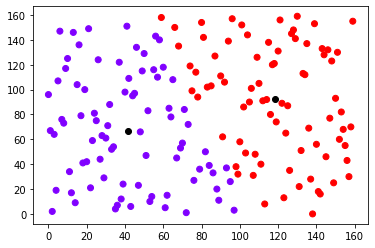

In [106]:
### plotando clusters de Meal, Inexpensive Restaurant (2 coluna)
plt.scatter(df.iloc[:,0],df.iloc[:,56], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [107]:
## y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])
y = kmeans.fit_predict(df)
df['Cluster'] = y
df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",media,Cluster
0,119,68,58,36,50,25,33,30,43,34,19,84,32,31,27,53,19,26,39,89,14,63,80,76,81,74,79,2,6,49,117,36,124,123,93,120,80,76,62,115,50,11,36,35,41,25,44,50,24,70,16,12,47,87,105,64,74,1
1,63,31,12,22,66,47,25,8,17,7,46,27,4,50,75,88,32,16,25,74,43,110,30,27,28,25,33,10,45,41,100,19,22,11,24,19,31,20,31,138,27,28,28,17,11,28,24,45,43,18,76,23,88,106,80,87,85,1
2,64,12,6,3,52,40,23,6,12,8,38,21,3,35,66,67,24,18,13,49,42,110,15,16,8,8,22,8,39,11,70,2,15,2,13,12,8,8,24,142,16,35,25,12,5,21,20,27,44,12,71,21,72,108,55,58,78,1
3,57,92,107,91,95,93,114,93,41,98,69,65,75,84,95,105,89,86,126,109,72,96,117,121,116,121,56,6,66,87,138,105,142,64,119,144,137,131,120,0,109,52,134,72,65,46,101,113,79,99,63,57,118,137,94,7,110,0
4,38,32,28,29,8,4,25,21,14,6,16,44,29,4,18,27,9,0,26,11,38,24,22,28,17,28,88,6,13,54,77,37,79,106,132,109,11,13,7,106,44,4,22,6,39,25,42,10,25,57,49,22,16,31,51,24,12,1
